In [2]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\HP\\Downloads\\cereals.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.ndim)
print(df.shape)


                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4             Almond_Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  
2
(74, 16)


In [3]:
newdf = df.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
print(newdf.head())

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1       120        3    5      15    2.0    8.0       8     135         0   
2        70        4    1     260    9.0    7.0       5     320        25   
3        50        4    0     140   14.0    8.0       0     330        25   
4       110        2    2     200    1.0   14.0       8      -1        25   

      rating  
0  68.402973  
1  33.983679  
2  59.425505  
3  93.704912  
4  34.384843  


In [14]:
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
results = smf.ols('rating ~ calories + sugars+fiber+protein', data=newdf).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     107.5
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           6.92e-29
Time:                        04:30:31   Log-Likelihood:                -228.04
No. Observations:                  74   AIC:                             466.1
Df Residuals:                      69   BIC:                             477.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7613      4.417     16.022      0.0

In [6]:
df2 = newdf.corr()
print(df2)

          calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000 -0.071648  0.425627  0.354206 -0.355982  0.256388   
protein  -0.071648  1.000000  0.143655 -0.039885  0.498610 -0.143227   
fat       0.425627  0.143655  1.000000  0.019642 -0.020329 -0.350141   
sodium    0.354206 -0.039885  0.019642  1.000000 -0.067327  0.362717   
fiber    -0.355982  0.498610 -0.020329 -0.067327  1.000000 -0.355039   
carbo     0.256388 -0.143227 -0.350141  0.362717 -0.355039  1.000000   
sugars    0.547685 -0.381669  0.229358  0.114690 -0.165885 -0.340435   
potass   -0.158991  0.532237  0.129051 -0.020719  0.906521 -0.359012   
vitamins  0.297116  0.013806 -0.022762  0.361351 -0.028791  0.259354   
rating   -0.712054  0.504070 -0.407215 -0.409548  0.600230  0.055804   

            sugars    potass  vitamins    rating  
calories  0.547685 -0.158991  0.297116 -0.712054  
protein  -0.381669  0.532237  0.013806  0.504070  
fat       0.229358  0.129051 -0.022762 -0.407215  
sod

In [8]:
rating1 = df2.loc['rating']
print(rating1)

calories   -0.712054
protein     0.504070
fat        -0.407215
sodium     -0.409548
fiber       0.600230
carbo       0.055804
sugars     -0.760031
potass      0.410556
vitamins   -0.243780
rating      1.000000
Name: rating, dtype: float64


In [13]:
import pandasql as ps
q1 = "select * FROM rating1  where rating > 0.4"

print(ps.sqldf(q1))

     rating
0  0.504070
1  0.600230
2  0.410556
3  1.000000


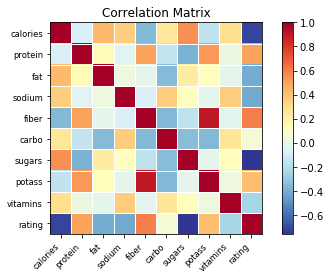

In [15]:
import statsmodels.graphics.api as smg
corr_matrix = np.corrcoef(newdf.T)
smg.plot_corr(corr_matrix, xnames=newdf.columns)
plt.show()

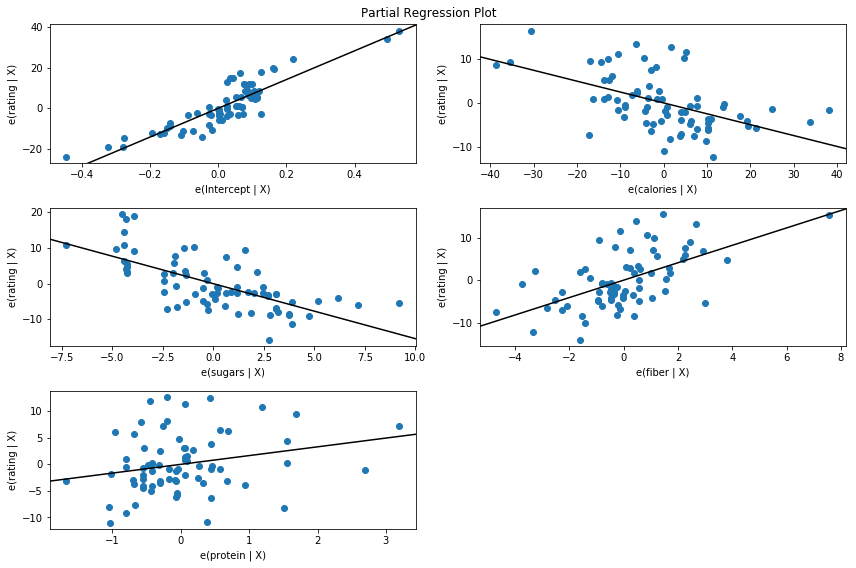

In [16]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)